# YAPAY ÖĞRENME PROJESİ

#### Selin Alp - Ezgi Gül

In [ ]:
import pandas as pd

#veri setini yükledik
veri_seti= pd.read_csv("dataset_Facebook.csv",sep=';')  #sep parametresi ile ayırarak daha okunabilir
                                                        #bir tablo görüntüsü elde ettik


#asıl halini bozmamak için bir kopyasını oluşturduk veri_seti adında
df = veri_seti.copy()

# yeni düzenlenmiş veri setini gösterdik ve kontrol amaçlı ilk başını head ile yazdırdık
df.head()


,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393


In [ ]:
#belirlenilen sütunları alıp yeni bir veri seti oluşturmak istediğimiz için
#öncelikle tüm sütunları yazdırıp(isim yazarken hata yapmamak için)
#veri_seti'nin istediğimiz sütunlarıylala yeni halini oluşturduk

print(veri_seti.columns) #veri setindeki sütunları kontrol ettik

Index(['Page total likes', 'Type', 'Category', 'Post Month', 'Post Weekday',
       'Post Hour', 'Paid', 'Lifetime Post Total Reach',
       'Lifetime Post Total Impressions', 'Lifetime Engaged Users',
       'Lifetime Post Consumers', 'Lifetime Post Consumptions',
       'Lifetime Post Impressions by people who have liked your Page',
       'Lifetime Post reach by people who like your Page',
       'Lifetime People who have liked your Page and engaged with your post',
       'comment', 'like', 'share', 'Total Interactions'],
      dtype='object')


In [ ]:
veri_seti=veri_seti[['Type','Category', 'Page total likes', 'Post Month',
'Post Hour', 'Post Weekday', 'Paid', 'Total Interactions']] #içinden belirli kategorilerle yeni tablo oluşturduk

In [ ]:
veri_seti.head() #kontrol amaçlı tablonun başını yazdırdık ve tekrar görebilmek için ilk 5 tanesini gösterdik

,Type,Category,Page total likes,Post Month,Post Hour,Post Weekday,Paid,Total Interactions
0,Photo,2,139441,12,3,4,0.0,100
1,Status,2,139441,12,10,3,0.0,164
2,Photo,3,139441,12,3,3,0.0,80
3,Photo,2,139441,12,10,2,1.0,1777
4,Photo,2,139441,12,3,2,0.0,393


In [ ]:
#daha doğru bir sonuç elde edebilmek için hocamız type sütunun nümerik değişkenlere dönüştürülmesini istemişti.
#bu yüzden her özelliğe aşağıda bir numara verdik

veri_seti['Type'] = veri_seti['Type'].map({'Photo': 1, 'Video': 2, 'Status': 3, 'Link': 4})

In [ ]:
#bu tabloda bazı null değerleri olabilir ve bu değerler doğrusal regresyon kodumuzun doğru çalışmasını engelleyebilir
#bu yüzden bunu kontrol etmek istedik ve yeni veri setimizdeki boş sütunları kontrol edip,
# bir listeye atıp bu listeyi yazdırdık. Sonuca göre gerçekten de paid sütununda boş değer varmış bunu görmüş olduk

df.isnull().values.any() #veri setinde boşluk olup olmadığını kontrol ettik

df = pd.DataFrame(veri_seti)

bos_sutunlar = df.columns[df.isnull().any()].tolist()
print(bos_sutunlar)

['Paid']


In [ ]:
#bu sütunun ortalamasını aldık ve bu değer ile boş noktaları onunla dolduracağız.
#bu null değerlerini doldurabilmek için başka yöntemlerimiz de varmış ama ortalama değerini yazmanın daha uygun olduğunu düşündük
#Bunun seçimi bize aitti

mean_paid = veri_seti['Paid'].mean()#sütunun ortalamasını aldık
veri_seti['Paid'].fillna(mean_paid, inplace = True) #paid sütununda 500.satır boş olduğu için paid'in tüm değerlerinin ortalamasını aldık ve 500.satıra değeri yazdık

In [ ]:
veri_seti['Paid'] #yeni hali bu şekilde oldu

0      0.000000
1      0.000000
2      0.000000
3      1.000000
4      0.000000
         ...   
495    0.000000
496    0.000000
497    0.000000
498    0.000000
499    0.278557
Name: Paid, Length: 500, dtype: float64

In [ ]:
pip install seaborn


In [ ]:
#499.değere baktığımızda görüyoruz ki aslında orası nullmuş ve ortalama değeri 0.278557 olan değerini oraya yazdırmışız

#LİNEER REGRESYON KISMI

import numpy as np #çok boyutlu diziler ve matematiksel işlemler için kullanılırmış
import pandas as pd #veri analizi ve işlemesi için kullanılırmış
import matplotlib.pyplot as plt #grafik oluşturmak için kullanılırmış
from sklearn.model_selection import train_test_split #Scikit-learn kütüphanesinden train_test_split fonksiyonunu içeri aktarıyormuş
#ve veri setini eğitim ve test alt kümelerine bölmek için kullanılırmış
from sklearn.preprocessing import StandardScaler #Scikit-learn kütüphanesinden StandardScaler sınıfını içeri aktarıyormuş
# ve veriyi standartlaştırmak (ortalama sıfır, standart sapma) için kullanılıyormuş
from sklearn.metrics import mean_squared_error #Scikit-learn kütüphanesinden mean_squared_error fonksiyonunu içeri aktarıyormuş
#ve ortalama karesel hata ölçümünü hesaplamak için kullanılıyormuş


%matplotlib inline
plt.style.use('seaborn') #grafikleri hücre içinde göstermek için kullanılıyormuş ve Seaborn, çekici ve bilgilendirici
# grafikler oluşturmak için kullanılan bir Matplotlib temasıymış

class DogrusalRegresyon:  #lineer regresyon modelini temsil ediyor

    def __init__(self, w_intercept=True):
        self.coef_ = None # modelin katsayılarını (eğimleri) temsil eden bir özellik oluşturduk ve
                          #başlangıçta bu değeri None (boş) olarak ayarladık
        self.intercept = w_intercept # modelin kesişim terimini kullanıp kullanmayacağını belirttik
        self.is_fit = False #modelin eğitilip eğitilmediğini takip etmek için bir özellik oluşturduk ve
                            #başlangıçta bu değeri False olarak ayarladık

    def fit(self, X, y): #giriş verileri X ve çıktı verileri y ile çağrdık
        X = self.convert_to_array(X) # diziye çevirdik
        y = self.convert_to_array(y) # diziye çevirdik

        if self.intercept: #modelin kullanıcıdan sabit değer alıp almadığını kontrol ettik ve
        #eğer self.intercept değeri True ise, giriş verilerine bunu ekledik
            X = self.add_intercept(X) #ekleme metodunu çağırdık

        temp_xtx = np.linalg.inv(np.dot(X.T, X)) # giriş verileri (X) üzerinden hesaplanan X'in transpozunu (X.T)
        #ve X'in kendisiyle iç çarpımını (np.dot(X.T, X)) aldık ve bu matrisin tersini (np.linalg.inv()) alarak
        #temp_xtx değişkenine atadık böylelikle lineer regresyon modelinin katsayılarını hesapladık

        temp_xty = np.dot(X.T, y)#giriş verileri (X) üzerinden hesaplanan X'in transpozunu (X.T) ve çıktı verileri (y)
        #arasındaki iç çarpımı (np.dot(X.T, y)) aldık ve  temp_xty değişkenine atadık böylelikle
        #lineer regresyon modelinin katsayılarını hesapladık

        self.coef_ = np.dot(temp_xtx, temp_xty) #yukarıda hesaplanan geçici matrislerin iç çarpımını alarak
        #lineer regresyon modelinin katsayılarını (self.coef_) belirledik

        self.is_fit = True #modelin eğitildiğini belirttik

    def tahmin(self, X): #lineer regresyon modeli üzerinden tahmin yapmak için kullanılan
        #metodun başlangıcını tanımladık
        if not self.is_fit: #tahmin yapmadan önce modelin eğitilip eğitilmediğini kontrol ettik
            raise ValueError("Fit edilmemiştir") #eğer model henüz eğitilmemişse, bir hata mesajıyla
            #ValueError yazdırır

        X = self.convert_to_array(X) #girdi verilerini (X) bir diziye (array) dönüştürdük
        #ve verilerin uygun formatta olmasını sağladık
        if self.intercept: # eğer(self.intercept True ise),
            #girdi verilerine bir intercept terimi ve lineer regresyon denklemine bir sabit ekledik
            X = self.add_intercept(X)
        return np.dot(X, self.coef_) #Tahmin işlemini gerçekleştirdik ve girdi verileri (X) ile
        #modelin katsayılarını (self.coef_) çarptık  ve tahmin edilen çıktıyı elde ettik

    def score(self, X, y): #modelin performansını değerlendirdik ve belirli bir ölçü olan R² skorunu döndürdük
        X = self.convert_to_array(X)
        y = self.convert_to_array(y)
        pred = self.predict(X) #predict metodunu kullanarak girdi verileri üzerinde tahmin yaptık
        mse = mean_squared_error(y, pred) #tahmin edilen değerlerle gerçek değerler arasındaki ortalama karesel hatayı (MSE) hesapladık
        r2 = 1 - (mse / np.var(y)) #R² skorunu hesapladık.R², varyans açıklama oranını ifade ediyormuş
        return mse #Hesaplanan R² skorunu döndürüdük. Bu skor, modelin ne kadar iyi uyarlandığını gösteren bir ölçüymüş ve
               #1'e ne kadar yakınsa, model o kadar iyiymiş

    # def convert_to_array(self, x): #giriş verilerini NumPy dizilerine dönüştürmek için kullandık
    #     x = self.pandas_to_numpy(x)#eğer giriş verisi bir Pandas DataFrame veya Series ise,
    #     #bu veriyi NumPy dizisine dönüştürdük eğer zaten bir NumPy dizisi ise,
    #     #değişiklik yapmadan bıraktık ve eğer başka bir veri tipi ise, bunu NumPy dizisine dönüştürdük.
    #     x = self.handle_1d_data(x)#giriş verisinin boyutunu kontrol ettik eğer giriş verisi 1 boyutlu bir dizi ise,
    #     #bu diziyi 2 boyutlu bir diziye çevirdik
    #     return x

    # def pandas_to_numpy(self, x): #bir giriş verisini Pandas DataFrame veya Series ise NumPy dizisine dönüştürdük
    #     if isinstance(x, (pd.DataFrame, pd.Series)): #eğer giriş verisi bir Pandas DataFrame veya Series ise,
    #         #to_numpy() metodu kullanarak bu veri NumPy dizisine dönüştürdük
    #         return x.to_numpy()
    #     if isinstance(x, np.ndarray):#eğer giriş verisi zaten bir NumPy dizisi ise, değişiklik yapmadan bıraktık
    #         return x
    #     return np.array(x)#eğer giriş verisi ne DataFrame ne de Series ise,
    #                        #bu veri direkt olarak bir NumPy dizisine dönüştürdük

    # def handle_1d_data(self, x): #giriş verisinin boyutunu kontrol ettik ve eğer bu veri 1 boyutlu bir dizi ise,
    #     #bu diziyi 2 boyutlu bir diziye dönüştürdük
    #     if x.ndim == 1: #dizinin boyutunu belirttik eğer giriş verisi 1 boyutlu bir dizi ise (vektör),
    #         #bu şart sağlanmış olarak kabul ettik
    #         x = x.reshape(-1, 1) #eğer 1 boyutlu bir dizi ise, reshape metodu kullanılarak bu diziyi 2 boyutlu
    #         #bir diziye çevirdik ve -1 kullanılması, dizinin boyutunu otomatik olarak ayarlamak için kullandık
    #         # rijinal dizinin uzunluğuna bağlı olarak sütun sayısını otomatik olarak belirledik
    #     return x

    def add_intercept(self, X): #bir matrise (X) bir sütun ekleyerek modelin sabit terimini (intercept) hesaplamak için kullandık
        rows = X.shape[0] #matrisin kaç satır olduğunu belirttik
        inter = np.ones(rows).reshape(-1, 1) # ones fonksiyonu ile tüm elemanları bir olan bir sütun vektörü oluşturduk
        #bu vektör, modelin sabit terimini temsil etti ve reshape metoduyla bu sütunu 2D bir diziye çevirdik
        return np.hstack((X, inter))# hstack fonksiyonu, iki diziyi yatay olarak birleştirdik
                      #ve matrisin sağ tarafına sabit terimi temsil eden sütunu ekledik







# 'Page total likes' sütunu varsa 'Post Share' sütunu oluşturduk
if 'Page total likes' in veri_seti.columns:
    veri_seti['Like'] = veri_seti['Page total likes'] + veri_seti.get('Post Share', 0)
else:
    print("Page total likes sütunu bulunamadı.")

# Kullanılmayan sütunları belirle (örneğin, kullanılmayan_sutun_1, kullanılmayan_sutun_2)
kullanilmayan_sutunlar =['Type', 'Category', 'Page total likes', 'Post Month', 'Post Hour', 'Post Weekday', 'Paid','Lifetime Post Total Reach', 'Lifetime Post Total Impressions', 'Lifetime Engaged Users', 'Lifetime Post Consumers', 'Lifetime Post Consumptions', 'Lifetime Post Impressions by people who have liked your Page', 'Lifetime Post reach by people who like your Page', 'Lifetime People who have liked your Page and engaged with your post', 'comment']


# Kullanılmayan sütunları veri setinden sildik
veri_seti = veri_seti.drop(kullanilmayan_sutunlar, axis=1)

# 'Type' sütununu sayısal değerlere eşle
#veri_seti['Type'] = veri_seti['Type'].map({'Photo': 1, 'Video': 2, 'Status': 3, 'Link': 4})

# 'Paid' sütunundaki eksik değerleri lineer interpolasyon kullanarak doldurduk
#veri_seti['Paid'].interpolate(method='linear', inplace=True)

# 'Paid' sütunundaki eksik değerleri lineer interpolasyon kullanarak doldurduk
veri_seti['share'].interpolate(method='linear', inplace=True)

# 'Total Interactions' sütunundaki eksik değerleri lineer interpolasyon kullanarak doldurduk
veri_seti['Total Interactions'].interpolate(method='linear', inplace=True)

# Bağımsız değişkenler ve bağımlı değişkeni seçtik
X = veri_seti[[ 'Like', 'share']]
y = veri_seti['Total Interactions']

# Veriyi eğitim ve test setlere ayırdık
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

# Veriyi standartlaştırdık
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Lineer regresyon modelini oluşturduk ve eğittirdik
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

# Test seti üzerinde tahmin yaptırttık
y_pred = lr.predict(X_test_scaled)



# Gerçek ve tahmin edilen değerleri karşılaştırarak bir grafik çizdirdik
plt.scatter(y_test, y_pred)
plt.xlabel("Gerçek Değerler")
plt.ylabel("Tahminler")
plt.title("Gerçek Değerler ve Tahminler")
plt.show()

# Model skorunu hesapla ve yazdırdık
score = lr.score(X_test_scaled, y_test)
print(f"R2 Score: {score}")

<ipython-input-17-3c1e7319afff>:17: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn') #grafikleri hücre içinde göstermek için kullanılıyormuş ve Seaborn, çekici ve bilgilendirici


KeyError: ignored

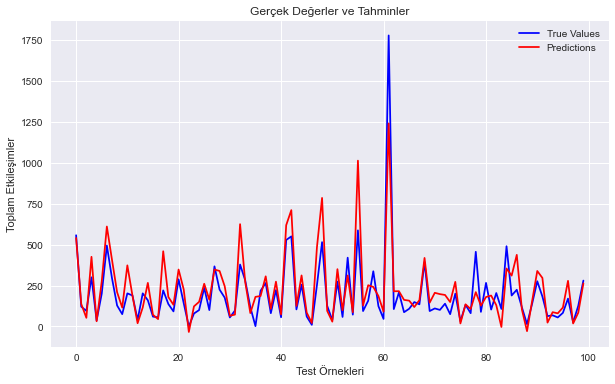

In [ ]:
# Gerçek ve tahmin edilen değerleri çizgi grafiği ile gösterdik
plt.figure(figsize=(10, 6))

# Gerçek değerleri mavi renkte çizdirdik
plt.plot(y_test.values, label='True Values', color='blue')

# Tahmin edilen değerleri kırmızı renkte çizdirdik
plt.plot(y_pred, label='Predictions', color='red')

plt.xlabel('Test Örnekleri')  # X ekseni etiketi
plt.ylabel('Toplam Etkileşimler')  # Y ekseni etiketi
plt.title('Gerçek Değerler ve Tahminler')  # Grafik başlığı
plt.legend()  # Renklerin neyi temsil ettiğini gösteren legent eklettirdik
plt.show()


Post Share sütunu bulunamadı.


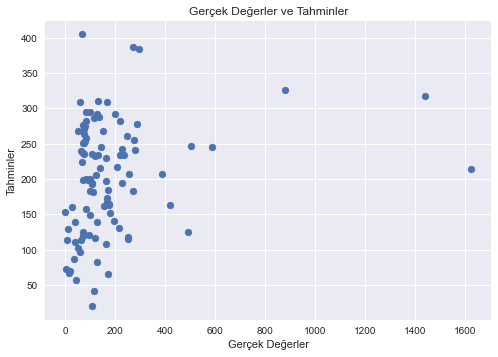

R2 Score: 0.03112767674870509


In [ ]:
#HOCANIN İSTEDİĞİ GİBİ OLAN KISIM

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

%matplotlib inline
plt.style.use('seaborn')

class LinearRegression:
    def __init__(self, w_intercept=True):
        self.coef_ = None
        self.intercept = w_intercept
        self.is_fit = False

    def fit(self, X, y):
        X = self.convert_to_array(X)
        y = self.convert_to_array(y)

        if self.intercept:
            X = self.add_intercept(X)

        temp_xtx = np.linalg.inv(np.dot(X.T, X))
        temp_xty = np.dot(X.T, y)
        self.coef_ = np.dot(temp_xtx, temp_xty)
        self.is_fit = True

    def predict(self, X):
        if not self.is_fit:
            raise ValueError("Fit etmeden bir yere gitmez bu fonksiyon")

        X = self.convert_to_array(X)
        if self.intercept:
            X = self.add_intercept(X)
        return np.dot(X, self.coef_)

    def score(self, X, y):
        X = self.convert_to_array(X)
        y = self.convert_to_array(y)
        pred = self.predict(X)
        mse = mean_squared_error(y, pred)
        r2 = 1 - (mse / np.var(y))
        return r2

    def convert_to_array(self, x):
        x = self.pandas_to_numpy(x)
        x = self.handle_1d_data(x)
        return x

    def pandas_to_numpy(self, x):
        if isinstance(x, (pd.DataFrame, pd.Series)):
            return x.to_numpy()
        if isinstance(x, np.ndarray):
            return x
        return np.array(x)

    def handle_1d_data(self, x):
        if x.ndim == 1:
            x = x.reshape(-1, 1)
        return x

    def add_intercept(self, X):
        rows = X.shape[0]
        inter = np.ones(rows).reshape(-1, 1)
        return np.hstack((X, inter))

# Veri setini yükledik
veri_seti = pd.read_csv("dataset_Facebook.csv", sep=';')

# 'Post Share' sütunu varsa 'Like' sütunu oluşturduk
if 'Post Share' in veri_seti.columns:
    veri_seti['Like'] = veri_seti['Post Share']
else:
    print("Post Share sütunu bulunamadı.")

# Kullanılmayan sütunları belirledik
kullanilmayan_sutunlar = ['Lifetime Post Total Reach', 'Lifetime Post Total Impressions', 'Lifetime Engaged Users', 'Lifetime Post Consumers', 'Lifetime Post Consumptions', 'Lifetime Post Impressions by people who have liked your Page', 'Lifetime Post reach by people who like your Page', 'Lifetime People who have liked your Page and engaged with your post', 'comment']

# Kullanılmayan sütunları veri setinden sildik
veri_seti = veri_seti.drop(kullanilmayan_sutunlar, axis=1)

# 'Type' sütununu sayısal değerlere eşledik
veri_seti['Type'] = veri_seti['Type'].map({'Photo': 1, 'Video': 2, 'Status': 3, 'Link': 4})

# 'Paid' sütunundaki eksik değerleri lineer interpolasyon kullanarak doldurduk
veri_seti['Paid'].interpolate(method='linear', inplace=True)

# Bağımsız değişkenler ve bağımlı değişkeni seçtik
X = veri_seti[['Type', 'Category', 'Page total likes', 'Post Month', 'Post Hour', 'Post Weekday', 'Paid']]
y = veri_seti['Total Interactions']

# Veriyi eğitim ve test setlere ayırdık
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Veriyi standartlaştırdık
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Lineer regresyon modelini oluşturduk ve eğittirdik
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

# Test seti üzerinde tahmin yaptırdık
y_pred = lr.predict(X_test_scaled)

# Gerçek ve tahmin edilen değerleri karşılaştırarak bir grafik çizdirdik
plt.scatter(y_test, y_pred)
plt.xlabel("Gerçek Değerler")
plt.ylabel("Tahminler")
plt.title("Gerçek Değerler ve Tahminler")
plt.show()

# Model skorunu hesapla ve yazdırdık
score = lr.score(X_test_scaled, y_test)
print(f"R2 Score: {score}")


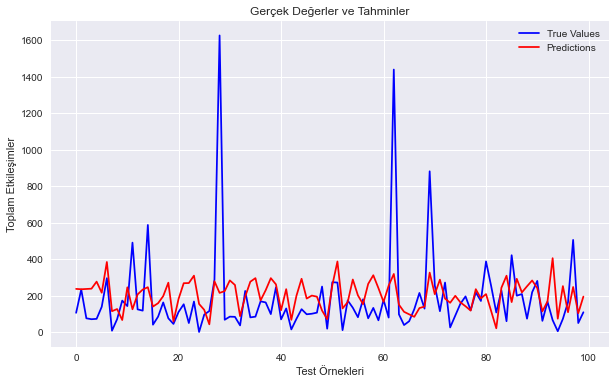

In [ ]:
# Gerçek ve tahmin edilen değerleri çizgi grafiği ile gösterdik
plt.figure(figsize=(10, 6))

# Gerçek değerleri mavi renkte çizdirdik
plt.plot(y_test.values, label='True Values', color='blue')

# Tahmin edilen değerleri kırmızı renkte çizdirdik
plt.plot(y_pred, label='Predictions', color='red')

plt.xlabel('Test Örnekleri')  # X ekseni etiketi
plt.ylabel('Toplam Etkileşimler')  # Y ekseni etiketi
plt.title('Gerçek Değerler ve Tahminler')  # Grafik başlığı
plt.legend()  # Renklerin neyi temsil ettiğini gösteren legend eklettik
plt.show()
